## For Boo3, model its orbit 1000x with uncertainties (Gaussian dist), compare with Carlin paper

In [16]:
# Importing our libraries and packages required for the orbit
from galpy.orbit import Orbit
from galpy import potential
import numpy as np
import matplotlib.pyplot as plt
from galpy.util import conversion
from stream_package.stream_package import graphics

# Importing potentials.
from galpy.potential import MWPotential2014,ChandrasekharDynamicalFrictionForce,HernquistPotential,MovingObjectPotential

/home/student04/.local/lib/python3.10/site-packages/galpy/util/bovy_conversion.py:6: FutureWarning: galpy.util.bovy_conversion is being deprecated in favor of galpy.util.conversion; all functions in there are the same; please switch to the new import, because the old import will be removed in v1.9
  warnings.warn('galpy.util.bovy_conversion is being deprecated in favor of galpy.util.conversion; all functions in there are the same; please switch to the new import, because the old import will be removed in v1.9',FutureWarning)

/home/student04/.local/lib/python3.10/site-packages/galpy/util/bovy_coords.py:6: FutureWarning: galpy.util.bovy_coords is being deprecated in favor of galpy.util.coords; all functions in there are the same; please switch to the new import, because the old import will be removed in v1.9
  warnings.warn('galpy.util.bovy_coords is being deprecated in favor of galpy.util.coords; all functions in there are the same; please switch to the new import, because the old impo

In [9]:
## 6D Data and uncertainties from Kevin's data
sixD = [209.3, 26.8, 46.5, -1.16, -0.88, 189.11]
sigma = [0, 0, 2, 0.02, 0.01, 1.56]

pot = MWPotential2014
ro = 8.
vo = 220.
mo = conversion.mass_in_msol(ro=ro, vo=vo)
solarmotion = [-11.1, 12.24, 7.25]

# How many data points I want, taking into account the uncertainty
N_unc = 1000
sixD_unc = np.random.normal(loc=sixD, scale=sigma, size = (N_unc,6))

## Without LMC:

In [10]:
# Initializing the orbits
o = Orbit(sixD, radec=True, solarmotion=solarmotion)
o_unc = Orbit(sixD_unc, radec=True, solarmotion=solarmotion)

In [11]:
# Initializing the timescale, so that I can integrate backwards 5Gyrs
t = 5
to = conversion.time_in_Gyr(ro=ro,vo=vo)
n = 1001
ts= np.linspace(0.,-t/to,n)

In [12]:
# Integrating the orbits
o.integrate(ts, pot=pot)
o_unc.integrate(ts, pot=pot)

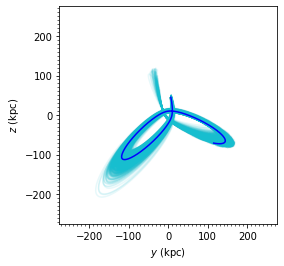

In [13]:
# Plotting.
o_unc.plot(d1='y', d2='z', alpha=0.1, c='#17becf')
o.plot(d1='y', d2='z', overplot=True, c='b')

ax = plt.gca()
ax.set_xlim(-275, 275)
ax.set_ylim(-275, 275)
ax.set_aspect('equal', adjustable='box')

In [14]:
p = o_unc.rperi()
a = o_unc.rap()

p_std = np.std(p)
a_std = np.std(a)
p_mean = np.mean(p)
a_mean = np.mean(a)

print('Pericentre error:', p_std, 'mean:', p_mean)
print('Apocentre error:', a_std, 'mean:', a_mean)

Pericentre error: 2.2203477004219643 mean: 9.899585555144888
Apocentre error: 23.27046097094713 mean: 166.6223850611464


## With LMC:

In [20]:
olmc = Orbit(sixD, radec=True, solarmotion=solarmotion)
o_unclmc = Orbit(sixD_unc, radec=True, solarmotion=solarmotion)

In [18]:
MWpotLMC = graphics.lmc_potential_wacc(t, pot=pot)

In [21]:
olmc.integrate(ts, pot=MWpotLMC)
o_unclmc.integrate(ts, pot=MWpotLMC)

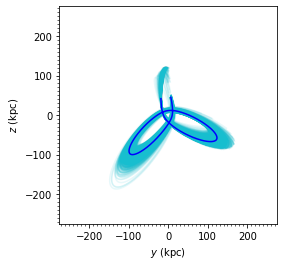

In [22]:
o_unclmc.plot(d1='y', d2='z', alpha=0.1, c='#17becf')
olmc.plot(d1='y', d2='z', overplot=True, c='b')

ax = plt.gca()
ax.set_xlim(-275, 275)
ax.set_ylim(-275, 275)
ax.set_aspect('equal', adjustable='box')

In [23]:
p = o_unclmc.rperi()
a = o_unclmc.rap()

p_std = np.std(p)
a_std = np.std(a)
p_mean = np.mean(p)
a_mean = np.mean(a)

print('Pericentre error:', p_std, 'mean:', p_mean)
print('Apocentre error:', a_std, 'mean:', a_mean)

Pericentre error: 2.298983827119056 mean: 10.51180801643036
Apocentre error: 19.36111679272901 mean: 142.61898370892462


## McMillan17

In [24]:
from galpy.potential.mwpotentials import McMillan17

In [25]:
ro17 = conversion.get_physical(McMillan17)['ro']
vo17 = conversion.get_physical(McMillan17)['vo']

o17 = Orbit(sixD, radec=True, solarmotion=solarmotion, ro = ro17, vo=vo17)
o_unc17 = Orbit(sixD_unc, radec=True, solarmotion=solarmotion, ro=ro17, vo=vo17)

In [26]:
o17.integrate(ts, McMillan17)
o_unc17.integrate(ts, McMillan17)

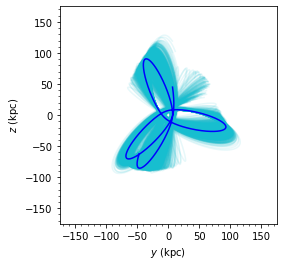

In [30]:
o_unc17.plot(d1='y', d2='z', alpha=0.1, c='#17becf')
o17.plot(d1='y', d2='z', overplot=True, c='b')

ax = plt.gca()
ax.set_xlim(-175, 175)
ax.set_ylim(-175, 175)
ax.set_aspect('equal', adjustable='box')

In [28]:
p = o_unc17.rperi()
a = o_unc17.rap()

p_std = np.std(p)
a_std = np.std(a)
p_mean = np.mean(p)
a_mean = np.mean(a)

print('Pericentre error:', p_std, 'mean:', p_mean)
print('Apocentre error:', a_std, 'mean:', a_mean)

Pericentre error: 1.7945521135016396 mean: 7.343702739725638
Apocentre error: 7.537224140065147 mean: 99.02183876937744


## McMillan17 including LMC

In [31]:
o17lmc = Orbit(sixD, radec=True, solarmotion=solarmotion, ro = ro17, vo=vo17)
o_unc17lmc = Orbit(sixD_unc, radec=True, solarmotion=solarmotion, ro=ro17, vo=vo17)

In [36]:
from astropy import units

pot17 = McMillan17

o_lmc= Orbit.from_name('LMC', ro=ro17, vo=vo17)
cdf= ChandrasekharDynamicalFrictionForce(GMs=10.**11.*units.Msun,rhm=5.*units.kpc,
                                             dens=pot17[1], ro=ro17, vo=vo17)
ts= np.linspace(0.,-10,1001)*units.Gyr
o_lmc.integrate(ts,pot17+cdf)

lmcpot= HernquistPotential(amp=2*10.**11.*units.Msun,
                           a=5.*units.kpc/(1.+np.sqrt(2.))) #rhm = (1+sqrt(2)) a
moving_lmcpot= MovingObjectPotential(o_lmc,pot=lmcpot)

from galpy.potential import (evaluateRforces, evaluatephitorques,
                             evaluatezforces)
loc_origin= 1e-4 # Small offset in R to avoid numerical issues
ax= lambda t: evaluateRforces(moving_lmcpot,loc_origin,0.,phi=0.,t=t,
                                  use_physical=False)
ay= lambda t: evaluatephitorques(moving_lmcpot,loc_origin,0.,phi=0.,t=t,
                                    use_physical=False)/loc_origin
az= lambda t: evaluatezforces(moving_lmcpot,loc_origin,0.,phi=0.,t=t,
                                  use_physical=False)

t_intunits= o_lmc.time(use_physical=False)[::-1] # need to reverse the order for interp
ax4int= np.array([ax(t) for t in t_intunits])
ax_int= lambda t: np.interp(t,t_intunits,ax4int)
ay4int= np.array([ay(t) for t in t_intunits])
ay_int= lambda t: np.interp(t,t_intunits,ay4int)
az4int= np.array([az(t) for t in t_intunits])
az_int= lambda t: np.interp(t,t_intunits,az4int)

from galpy.potential import NonInertialFrameForce
nip= NonInertialFrameForce(a0=[ax_int,ay_int,az_int])

In [37]:
MWpot17=McMillan17+moving_lmcpot+nip
ts= np.linspace(0.,-t/to,n)

o17lmc.integrate(ts, pot=MWpot17)
o_unc17lmc.integrate(ts, pot=MWpot17)

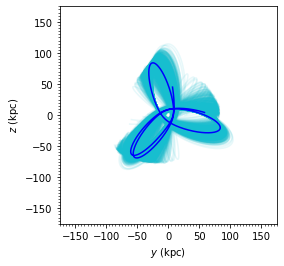

In [40]:
o_unc17lmc.plot(d1='y', d2='z', alpha=0.1, c='#17becf')
o17lmc.plot(d1='y', d2='z', overplot=True, c='b')

ax = plt.gca()
ax.set_xlim(-175, 175)
ax.set_ylim(-175, 175)
ax.set_aspect('equal', adjustable='box')

In [39]:
p = o_unc17lmc.rperi()
a = o_unc17lmc.rap()

p_std = np.std(p)
a_std = np.std(a)
p_mean = np.mean(p)
a_mean = np.mean(a)

print('Pericentre error:', p_std, 'mean:', p_mean)
print('Apocentre error:', a_std, 'mean:', a_mean)

Pericentre error: 1.8977672956563487 mean: 7.973303779529275
Apocentre error: 6.478030580127266 mean: 89.05250090990623


## MWPotential2014 mass doubled

In [46]:
MWpotx2 = MWPotential2014.copy()
MWpotx2[2]*=2

In [47]:
o2 = Orbit(sixD, radec=True, solarmotion=solarmotion)
o_unc2 = Orbit(sixD_unc, radec=True, solarmotion=solarmotion)

In [51]:
o2.integrate(ts/2, MWpotx2)
o_unc2.integrate(ts/2, MWpotx2)

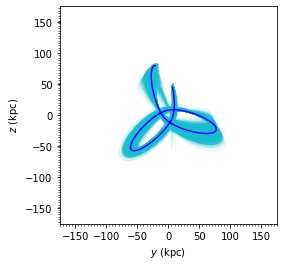

In [52]:
o_unc2.plot(d1='y', d2='z', alpha=0.1, c='#17becf')
o2.plot(d1='y', d2='z', overplot=True, c='b')

ax = plt.gca()
ax.set_xlim(-175, 175)
ax.set_ylim(-175, 175)
ax.set_aspect('equal', adjustable='box')

In [53]:
p = o_unc2.rperi()
a = o_unc2.rap()

p_std = np.std(p)
a_std = np.std(a)
p_mean = np.mean(p)
a_mean = np.mean(a)

print('Pericentre error:', p_std, 'mean:', p_mean)
print('Apocentre error:', a_std, 'mean:', a_mean)

Pericentre error: 1.7715022583438913 mean: 7.952273545341717
Apocentre error: 5.7996156591468875 mean: 83.52090080156798


## Mass doubled including LMC

In [55]:
o2lmc = Orbit(sixD, radec=True, solarmotion=solarmotion)
o_unc2lmc = Orbit(sixD_unc, radec=True, solarmotion=solarmotion)

In [54]:
MWpotx2LMC = graphics.lmc_potential_wacc(t, pot=MWpotx2)

In [56]:
o2lmc.integrate(ts/2, MWpotx2LMC)
o_unc2lmc.integrate(ts/2, MWpotx2LMC)

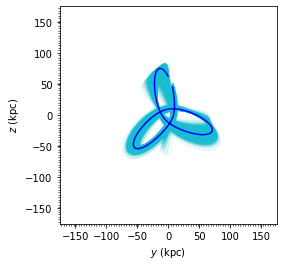

In [57]:
o_unc2lmc.plot(d1='y', d2='z', alpha=0.1, c='#17becf')
o2lmc.plot(d1='y', d2='z', overplot=True, c='b')

ax = plt.gca()
ax.set_xlim(-175, 175)
ax.set_ylim(-175, 175)
ax.set_aspect('equal', adjustable='box')

In [58]:
p = o_unc2lmc.rperi()
a = o_unc2lmc.rap()

p_std = np.std(p)
a_std = np.std(a)
p_mean = np.mean(p)
a_mean = np.mean(a)

print('Pericentre error:', p_std, 'mean:', p_mean)
print('Apocentre error:', a_std, 'mean:', a_mean)

Pericentre error: 1.8231920644521131 mean: 8.400712648513794
Apocentre error: 5.059445246798177 mean: 77.02318353102045


## Compute mean actions

### MWPotential2014

In [60]:
jp = o_unc.jp(pot=MWPotential2014)
jr = o_unc.jr(pot=MWPotential2014)
jz = o_unc.jz(pot=MWPotential2014)

jp_std = np.std(jp)
jr_std = np.std(jr)
jz_std = np.std(jz)

jp_mean = np.mean(jp)
jr_mean = np.mean(jr)
jz_mean = np.mean(jz)

print('Azimuthal Action error:', jp_std, 'mean:', jp_mean)
print('Radial Action error:', jr_std, 'mean:', jr_mean)
print('Vertical Action error:', jz_std, 'mean:', jz_mean)

Azimuthal Action error: 30.72900902326371 mean: 9.22529332161165
Radial Action error: 736.2698038611242 mean: 8086.926248523787
Vertical Action error: 773.1401776334179 mean: 4144.771081621093


### MWPotential2014 inc. LMC

In [76]:
jp = o_unclmc.jp(pot=MWpotLMC)
jr = o_unclmc.jr(pot=MWpotLMC)
jz = o_unclmc.jz(pot=MWpotLMC)

jp_std = np.std(jp)
jr_std = np.std(jr)
jz_std = np.std(jz)

jp_mean = np.mean(jp)
jr_mean = np.mean(jr)
jz_mean = np.mean(jz)

print('Azimuthal Action error:', jp_std, 'mean:', jp_mean)
print('Radial Action error:', jr_std, 'mean:', jr_mean)
print('Vertical Action error:', jz_std, 'mean:', jz_mean)

PotentialError: 'Automagic calculation of delta parameter for Staeckel approximation failed because the given potential is not axisymmetric; pass an axisymmetric potential instead'

### McMillan17

In [72]:
jp = o_unc17.jp(pot=McMillan17[1])
jr = o_unc17.jr(pot=McMillan17[1])
jz = o_unc17.jz(pot=McMillan17[1])

jp_std = np.std(jp)
jr_std = np.std(jr)
jz_std = np.std(jz)

jp_mean = np.mean(jp)
jr_mean = np.mean(jr)
jz_mean = np.mean(jz)

print('Azimuthal Action error:', jp_std, 'mean:', jp_mean)
print('Radial Action error:', jr_std, 'mean:', jr_mean)
print('Vertical Action error:', jz_std, 'mean:', jz_mean)

Azimuthal Action error: 26.070587463314897 mean: -21.247259056128815
Radial Action error: 208.79802739794022 mean: 6250.283974961691
Vertical Action error: 777.9773157335883 mean: 3473.4297129764614


### McMillan17 inc. LMC

In [ ]:
jp = o_unc17lmc.jp(pot=MWpot17)
jr = o_unc17lmc.jr(pot=MWpot17)
jz = o_unc17lmc.jz(pot=MWpot17)

jp_std = np.std(jp)
jr_std = np.std(jr)
jz_std = np.std(jz)

jp_mean = np.mean(jp)
jr_mean = np.mean(jr)
jz_mean = np.mean(jz)

print('Azimuthal Action error:', jp_std, 'mean:', jp_mean)
print('Radial Action error:', jr_std, 'mean:', jr_mean)
print('Vertical Action error:', jz_std, 'mean:', jz_mean)

### MWPotential2014 x2

In [78]:
jp = o_unc2.jp(pot=MWpotx2)
jr = o_unc2.jr(pot=MWpotx2)
jz = o_unc2.jz(pot=MWpotx2)

jp_std = np.std(jp)
jr_std = np.std(jr)
jz_std = np.std(jz)

jp_mean = np.mean(jp)
jr_mean = np.mean(jr)
jz_mean = np.mean(jz)

print('Azimuthal Action error:', jp_std, 'mean:', jp_mean)
print('Radial Action error:', jr_std, 'mean:', jr_mean)
print('Vertical Action error:', jz_std, 'mean:', jz_mean)

Azimuthal Action error: 30.72900902326371 mean: 9.22529332161165
Radial Action error: 90.87850802900766 mean: 5410.712798879616
Vertical Action error: 773.784249139621 mean: 4141.701995250157


### MWPotential2014 x2 inc. LMC

In [ ]:
jp = o_unc2lmc.jp(pot=MWpotx2LMC)
jr = o_unc2lmc.jr(pot=MWpotx2LMC)
jz = o_unc2lmc.jz(pot=MWpotx2LMC)

jp_std = np.std(jp)
jr_std = np.std(jr)
jz_std = np.std(jz)

jp_mean = np.mean(jp)
jr_mean = np.mean(jr)
jz_mean = np.mean(jz)

print('Azimuthal Action error:', jp_std, 'mean:', jp_mean)
print('Radial Action error:', jr_std, 'mean:', jr_mean)
print('Vertical Action error:', jz_std, 'mean:', jz_mean)

## Computing mean energy & angular momentum

### MWPotential2014

In [102]:
E = o_unc.E()
L0 = o_unc.L()[:,0]
L1 = o_unc.L()[:,1]
L2 = o_unc.L()[:,2]

E_std = np.std(E)
L0_std = np.std(L0)
L1_std = np.std(L1)
L2_std = np.std(L2)

E_mean = np.mean(E)
L0_mean = np.mean(L0)
L1_mean = np.mean(L1)
L2_mean = np.mean(L2)

print('Energy error:', E_std, 'mean:', E_mean, 'in MJ/kg')
print('Angular momentum [0] error:', L0_std, 'mean:', L0_mean)
print('Angular momentum [1] error:', L1_std, 'mean:', L1_mean)
print('Angular momentum [2] error:', L2_std, 'mean:', L2_mean)

Energy error: 2590.9803642877796 mean: 35828.94814465908 in MJ/kg
Angular momentum [0] error: 758.2030172892323 mean: 3967.3349994844775
Angular momentum [1] error: 283.7963913802559 mean: 969.2020839710142
Angular momentum [2] error: 30.729009023263707 mean: 9.225293321611655


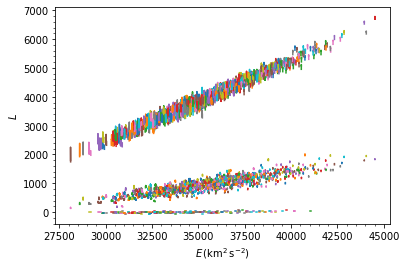

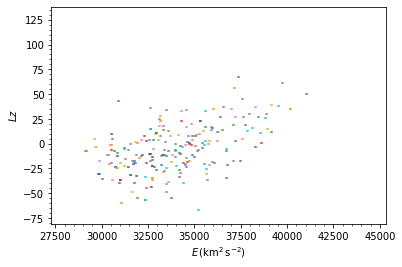

In [103]:
o_unc.plot(d1='E', d2='L')
o_unc.plot(d1='E', d2='Lz')

### MWPotential inc. LMC

In [104]:
E = o_unclmc.E()
L0 = o_unclmc.L()[:,0]
L1 = o_unclmc.L()[:,1]
L2 = o_unclmc.L()[:,2]

E_std = np.std(E)
L0_std = np.std(L0)
L1_std = np.std(L1)
L2_std = np.std(L2)

E_mean = np.mean(E)
L0_mean = np.mean(L0)
L1_mean = np.mean(L1)
L2_mean = np.mean(L2)

print('Energy error:', E_std, 'mean:', E_mean, 'in MJ/kg')
print('Angular momentum [0] error:', L0_std, 'mean:', L0_mean)
print('Angular momentum [1] error:', L1_std, 'mean:', L1_mean)
print('Angular momentum [2] error:', L2_std, 'mean:', L2_mean)

Energy error: 2680.399732800738 mean: 31014.73166632739 in MJ/kg
Angular momentum [0] error: 758.2030172892323 mean: 3967.3349994844775
Angular momentum [1] error: 283.7963913802559 mean: 969.2020839710142
Angular momentum [2] error: 30.729009023263707 mean: 9.225293321611655


### McMillan17

In [105]:
E = o_unc17.E()
L0 = o_unc17.L()[:,0]
L1 = o_unc17.L()[:,1]
L2 = o_unc17.L()[:,2]

E_std = np.std(E)
L0_std = np.std(L0)
L1_std = np.std(L1)
L2_std = np.std(L2)

E_mean = np.mean(E)
L0_mean = np.mean(L0)
L1_mean = np.mean(L1)
L2_mean = np.mean(L2)

print('Energy error:', E_std, 'mean:', E_mean, 'in MJ/kg')
print('Angular momentum [0] error:', L0_std, 'mean:', L0_mean)
print('Angular momentum [1] error:', L1_std, 'mean:', L1_mean)
print('Angular momentum [2] error:', L2_std, 'mean:', L2_mean)

Energy error: 2951.712529705389 mean: -65583.14144893996 in MJ/kg
Angular momentum [0] error: 734.6051186739606 mean: 3376.5289323058373
Angular momentum [1] error: 283.2806064123011 mean: 916.6041444465873
Angular momentum [2] error: 26.070587463314894 mean: -21.247259056128815


### McMillan17 inc. LMC

In [106]:
E = o_unc17lmc.E()
L0 = o_unc17lmc.L()[:,0]
L1 = o_unc17lmc.L()[:,1]
L2 = o_unc17lmc.L()[:,2]

E_std = np.std(E)
L0_std = np.std(L0)
L1_std = np.std(L1)
L2_std = np.std(L2)

E_mean = np.mean(E)
L0_mean = np.mean(L0)
L1_mean = np.mean(L1)
L2_mean = np.mean(L2)

print('Energy error:', E_std, 'mean:', E_mean, 'in MJ/kg')
print('Angular momentum [0] error:', L0_std, 'mean:', L0_mean)
print('Angular momentum [1] error:', L1_std, 'mean:', L1_mean)
print('Angular momentum [2] error:', L2_std, 'mean:', L2_mean)

Energy error: 3055.4814866845204 mean: -71126.25365316638 in MJ/kg
Angular momentum [0] error: 734.6051186739606 mean: 3376.5289323058373
Angular momentum [1] error: 283.2806064123011 mean: 916.6041444465873
Angular momentum [2] error: 26.070587463314894 mean: -21.247259056128815


### MWPotential x2

In [107]:
E = o_unc2.E()
L0 = o_unc2.L()[:,0]
L1 = o_unc2.L()[:,1]
L2 = o_unc2.L()[:,2]

E_std = np.std(E)
L0_std = np.std(L0)
L1_std = np.std(L1)
L2_std = np.std(L2)

E_mean = np.mean(E)
L0_mean = np.mean(L0)
L1_mean = np.mean(L1)
L2_mean = np.mean(L2)

print('Energy error:', E_std, 'mean:', E_mean, 'in MJ/kg')
print('Angular momentum [0] error:', L0_std, 'mean:', L0_mean)
print('Angular momentum [1] error:', L1_std, 'mean:', L1_mean)
print('Angular momentum [2] error:', L2_std, 'mean:', L2_mean)

Energy error: 3601.816987648856 mean: -19710.151827093898 in MJ/kg
Angular momentum [0] error: 758.2030172892323 mean: 3967.3349994844775
Angular momentum [1] error: 283.7963913802559 mean: 969.2020839710142
Angular momentum [2] error: 30.729009023263707 mean: 9.225293321611655


### MWPotential x2 inc. LMC

In [108]:
E = o_unc2lmc.E()
L0 = o_unc2lmc.L()[:,0]
L1 = o_unc2lmc.L()[:,1]
L2 = o_unc2lmc.L()[:,2]

E_std = np.std(E)
L0_std = np.std(L0)
L1_std = np.std(L1)
L2_std = np.std(L2)

E_mean = np.mean(E)
L0_mean = np.mean(L0)
L1_mean = np.mean(L1)
L2_mean = np.mean(L2)

print('Energy error:', E_std, 'mean:', E_mean, 'in MJ/kg')
print('Angular momentum [0] error:', L0_std, 'mean:', L0_mean)
print('Angular momentum [1] error:', L1_std, 'mean:', L1_mean)
print('Angular momentum [2] error:', L2_std, 'mean:', L2_mean)

Energy error: 3692.4614705675217 mean: -24524.368305425593 in MJ/kg
Angular momentum [0] error: 758.2030172892323 mean: 3967.3349994844775
Angular momentum [1] error: 283.7963913802559 mean: 969.2020839710142
Angular momentum [2] error: 30.729009023263707 mean: 9.225293321611655
